# Pregunta 1

1. Resuelve el siguiente problema (cualquier método):
   \begin{equation*}
   \begin{aligned}
   \text{Maximizar} \quad & x+2y\\
   \text{sujeto a} \quad &
     \begin{aligned}
      x &\geq  0\\
      y &\geq 0\\
      2x+y &\leq 2
     \end{aligned}
   \end{aligned}
   \end{equation*}

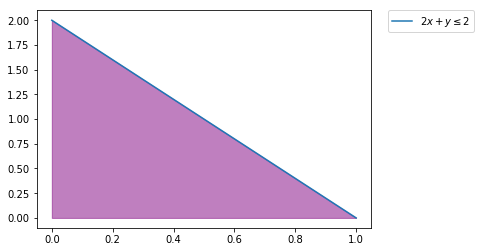

In [14]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


x = np.linspace(0, 1, 200)
y = 2 - 2*x



plt.plot(x, y, label=r'$2x+y\leq2$')

plt.fill_between(x, y,  color='purple', alpha=0.5)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [96]:
from pulp import *
x = LpVariable("x", 0)
y = LpVariable("y", 0)


In [60]:
prob = LpProblem("Pregunta 1", LpMaximize)
prob += 2*x + y <= 2

In [61]:
prob += x + 2*y

In [62]:
prob

Pregunta 1:
MAXIMIZE
1*x + 2*y + 0
SUBJECT TO
_C1: 2 x + y <= 2

VARIABLES
x Continuous
y Continuous

In [63]:
status = prob.solve()
value(x), value(y),value(prob.objective)

(0.0, 2.0, 4.0)

# Pregunta 2

2. Resuelve el siguiente problema (cualquier método):
   \begin{equation*}
    \begin{aligned}
   \text{Maximizar} \quad & x_{1}+2x_{2}\\
   \text{sujeto a} \quad &
     \begin{aligned}
      3x_{1}+4x_{2} &\leq 12\\
      x_{1}-x_{2} &\leq 2\\
      -2x_{1}+x_{2} &\leq 2\\
       x_{1} &\geq 0\\
       x_{2} &\geq 0
     \end{aligned}
   \end{aligned}
   \end{equation*}

In [67]:
prob = LpProblem("Pregunta 2", LpMaximize)
prob += 3*x1 + 4*x2 <= 12
prob += x1 - x2 <= 2
prob += -2*x1 + x2 <= 2

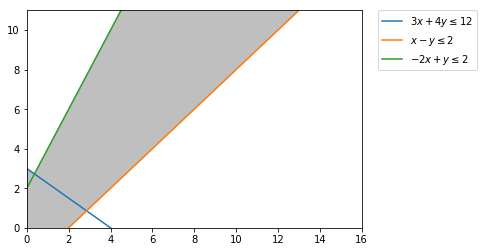

In [81]:
x = np.linspace(0, 20, 200)

y1=(12-3*x)/4
y2=x-2
y3=2+2*x


plt.plot(x, y1, label=r'$3x + 4y\leq12$')
plt.plot(x, y2, label=r'$x - y\leq2$')
plt.plot(x, y3, label=r'$-2x + y\leq2$')
plt.xlim((0, 16))
plt.ylim((0, 11))

y4 = np.maximum(y1, y3)
y5 = np.minimum(x, y2)


plt.fill_between(x, y4, y5, color='grey', alpha=0.5)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


In [26]:
from pulp import *

x1 = LpVariable("x1", 0)
x2 = LpVariable("x2", 0)

In [68]:
prob += x1 + 2*x2

In [69]:
prob

Pregunta 2:
MAXIMIZE
1*x1 + 2*x2 + 0
SUBJECT TO
_C1: 3 x1 + 4 x2 <= 12

_C2: x1 - x2 <= 2

_C3: - 2 x1 + x2 <= 2

VARIABLES
x1 Continuous
x2 Continuous

In [70]:
status = prob.solve()
value(x1), value(x2),value(prob.objective)

(0.36363636, 2.7272727, 5.81818176)

# Pregunta 3

3. Resuelve el siguiente problema (cualquier método):
   \begin{equation*}
   \begin{aligned}
   \text{Maximizar} \quad & 4x_{1}+x_{2}+3x_{3}\\
   \text{sujeto a} \quad &
     \begin{aligned}
      x_{1} & \leq 3\\
      x_{2} &\leq 5\\
      x_{3} &\leq 2\\
      x_{1}+x_{2}+2x_{3} &\leq 10\\
      x_{1},x_{2},x_{3} &\geq 0
     \end{aligned}
   \end{aligned}
   \end{equation*}

In [71]:
x1 = LpVariable("x1", 0, 3)
x2 = LpVariable("x2", 0, 5)
x3 = LpVariable("x3", 0, 2)

In [72]:
prob = LpProblem("Pregunta 3", LpMaximize)
prob += x1 + x1 + 2*x3 <= 10


In [73]:
prob += 4*x1 + x2 + 3*x3

In [74]:
prob


Pregunta 3:
MAXIMIZE
4*x1 + 1*x2 + 3*x3 + 0
SUBJECT TO
_C1: 2 x1 + 2 x3 <= 10

VARIABLES
x1 <= 3 Continuous
x2 <= 5 Continuous
x3 <= 2 Continuous

In [76]:
status = prob.solve()
value(x1), value(x2), value(x3), value(prob.objective)

(3.0, 5.0, 2.0, 23.0)

# Pregunta 4

4. Un gerente está planeando cómo distribuir la producción de tres
   productos entre dos máquinas. Para ser manufacturado cada producto
   requiere cierto tiempo (en horas) en cada una de las máquinas.

   El tiempo requerido está resumido en la siguiente tabla:

| producto/maquina | maquina 1 | maquina 2 |
|------------------|-----------|-----------|
| A                | 1         | 1         |
| B                | 2         | 1         |
| C                | 2         | 2         |

La máquina 1 está disponible 40 horas a la semana y la 2 está
   disponible 34 horas a la semana.

   Si la utilidad obtenida al vender los productos A, B y C es de 2, 3
   y 5 pesos por unidad, respectivamente, ¿cuál debe ser la producción
   semanal que maximiza la utilidad? ¿Cuál es la utilidad máxima?

In [85]:
x = LpVariable("x", 0)
y = LpVariable("y", 0)
z = LpVariable("z", 0)

In [90]:
prob = LpProblem("Pregunta 4", LpMaximize)
prob += x + 2*y + 2*z <= 40
prob += x + y + 2*z <= 34

In [91]:
prob += 2*x + 3*y + 5*z

In [92]:
prob

Pregunta 4:
MAXIMIZE
2*x + 3*y + 5*z + 0
SUBJECT TO
_C1: x + 2 y + 2 z <= 40

_C2: x + y + 2 z <= 34

VARIABLES
x Continuous
y Continuous
z Continuous

In [93]:
status = prob.solve()
value(x), value(y), value(z), value(prob.objective)

(0.0, 6.0, 14.0, 88.0)

# Pregunta 5

5. Demuestra que el conjunto \(\{(x,y)\mid x\geq 0\}\subseteq
   \mathbb{R}^{2}\) es convexo.


# Pregunta 6

6. Demuestra que la intersección de dos conjuntos convexos es convexo.

In [95]:
import numpy as np
import matplotlib.pyplot as plt